# 1. Standard Scaling
Standard scaling is a method of scaling the data such that the distribution of the data is centered around O, with a standard deviation of 1. This is done by subtracting the mean of the data from each point and the dividing by the standard deviation of the data. This is a very common method of scaling data, and is used in many machine learning algorithums.  

The formula is a follows:

z = (x - μ) / σ

In [22]:
# import libraries 
import pandas as pd 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

In [23]:
# make an example dataset
df = {
    'age': [25,30,35,40,45],
    'height': [165,170,175,180,185],
    'weight': [55,60,65,70,75]
}

# cover this data to pandas datafram 
df = pd.DataFrame(df)
df.head()

,age,height,weight
0,25,165,55
1,30,170,60
2,35,175,65
3,40,180,70
4,45,185,75


In [24]:
# import the scaler  
scaler = StandardScaler()

# fit the scaler on the data 
scaled_df = scaler.fit_transform(df)
scaled_df
# convert this data into a pandas datafram 
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()

,age,height,weight
0,-1.414214,-1.414214,-1.414214
1,-0.707107,-0.707107,-0.707107
2,0.000000,0.000000,0.000000
3,0.707107,0.707107,0.707107
4,1.414214,1.414214,1.414214


# Min-max scaler

In [25]:
# import the scaler  
scaler = MinMaxScaler()

# fit the scaler on the data 
scaled_df = scaler.fit_transform(df)
scaled_df
# convert this data into a pandas datafram 
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()

,age,height,weight
0,0.00,0.00,0.00
1,0.25,0.25,0.25
2,0.50,0.50,0.50
3,0.75,0.75,0.75
4,1.00,1.00,1.00


# Max ABS scaler

In [26]:
# import the scaler  
scaler = MaxAbsScaler()

# fit the scaler on the data 
scaled_df = scaler.fit_transform(df)
scaled_df
# convert this data into a pandas datafram 
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()


,age,height,weight
0,0.555556,0.891892,0.733333
1,0.666667,0.918919,0.800000
2,0.777778,0.945946,0.866667
3,0.888889,0.972973,0.933333
4,1.000000,1.000000,1.000000


In [27]:
from sklearn.preprocessing import RobustScaler

# import the scaler  
scaler = RobustScaler()

# fit the scaler on the data 
scaled_df = scaler.fit_transform(df)
scaled_df
# convert this data into a pandas datafram 
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()

,age,height,weight
0,-1.0,-1.0,-1.0
1,-0.5,-0.5,-0.5
2,0.0,0.0,0.0
3,0.5,0.5,0.5
4,1.0,1.0,1.0


---- 
# Transformation

In [28]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [29]:
# generate non-normal data(exponantial Distribution)
np.random.seed()
df = np.random.exponential(size=1000, scale=2)
df = pd.DataFrame(df, columns=['values'])
df.head()

,values
0,1.315364
1,3.617621
2,0.127865
3,0.800692
4,4.261342


<Axes: xlabel='values', ylabel='Count'>

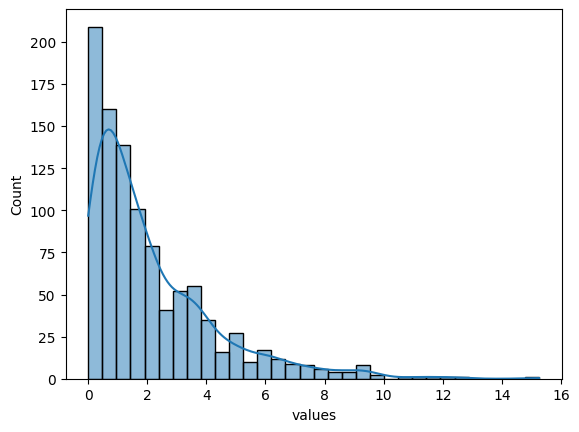

In [30]:
sns.histplot(df['values'], kde=True)

In [39]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

pt_boxcox = PowerTransformer(method='box-cox', standardize=False)
pt_yeo_johson = PowerTransformer(method='yeo-johnson', standardize=False)
qt_normal = QuantileTransformer(output_distribution='normal')

# boxcox K liay data must be positive
df['Box_cox'] = pt_boxcox.fit_transform(df[['values']] + 1)
df['Yeo_Johnson'] = pt_yeo_johson.fit_transform(df[['values']])
df['Quantile'] = qt_normal.fit_transform(df[['values']])

In [40]:
df.head()

,values,Box_cox,Yeo_Johnson,Quantile
0,1.315364,0.715174,0.715174,-0.041413
1,3.617621,1.149962,1.149962,0.888309
2,0.127865,0.117527,0.117527,-1.644369
3,0.800692,0.525172,0.525172,-0.436240
4,4.261342,1.219716,1.219716,1.125776


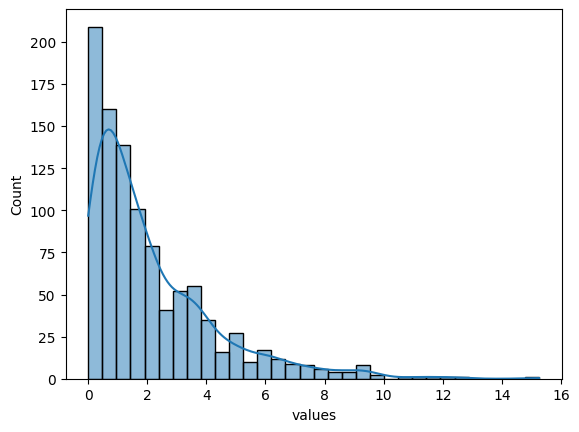

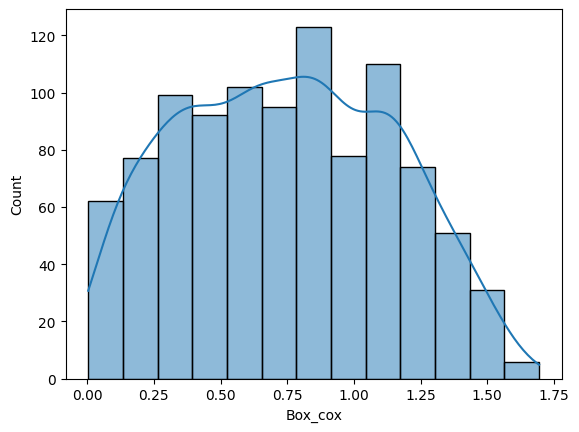

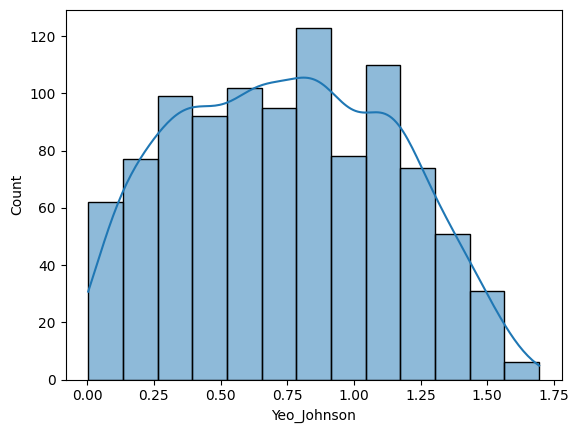

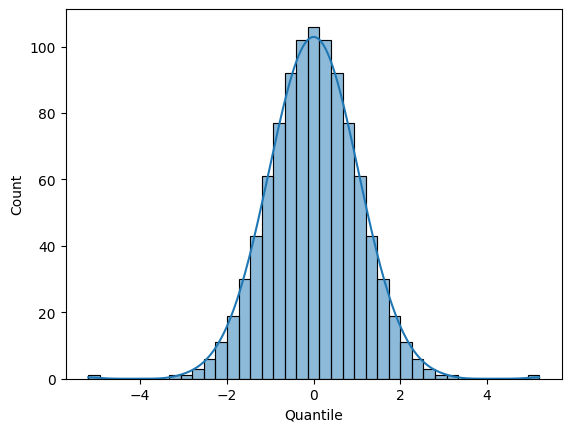

In [41]:
# create histogram for all columns using sns,hist and kde=True use a for loop 
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.show()

--- 
# Normalization


### L2 Normalization

Rescales each sample (row) to have unit norm, This type kof normalization as often used when dealing wuth test data.
The L2 norm of calulated as the square root of the sum of the squared vector values.

In [42]:
from sklearn.preprocessing import Normalizer
data = [[1,1,1], [1,1,0], [1,0,0]]
normalizer = Normalizer(norm= 'l2')
print(normalizer.fit_transform(data))

[[0.57735027 0.57735027 0.57735027]
 [0.70710678 0.70710678 0.        ]
 [1.         0.         0.        ]]


### L1 Normalization 

Also rescale each sample (row) but with a different approach, ensring the sum of the absolute is 1 in each row.
The L1 norm is calculated as the sum of the absolute vector values.
Example:

In [43]:
from sklearn.preprocessing import Normalizer
data = [[1,1,1], [1,1,0], [1,0,0]]
normalizer = Normalizer(norm= 'l1')
print(normalizer.fit_transform(data))

[[0.33333333 0.33333333 0.33333333]
 [0.5        0.5        0.        ]
 [1.         0.         0.        ]]


1. Z-score normalization
   1. Standard scaler
2. Min-Max normalization
   1. Min-Max scaler 

# log Transformation

In [44]:
import pandas as pd 
import numpy as np 

# example dataset with skewed values
df = { "Values": [1,5,10,20,50,100,200,500,1000,2000,5000,10000,20000,50000,100000]}
df = pd.DataFrame(df)
df.head()

,Values
0,1
1,5
2,10
3,20
4,50


In [50]:
df['log_values'] = np.log(df['Values'])
df

,Values,log_values
0,1,0.000000
1,5,1.609438
2,10,2.302585
3,20,2.995732
4,50,3.912023
5,100,4.605170
6,200,5.298317
7,500,6.214608
8,1000,6.907755
9,2000,7.600902


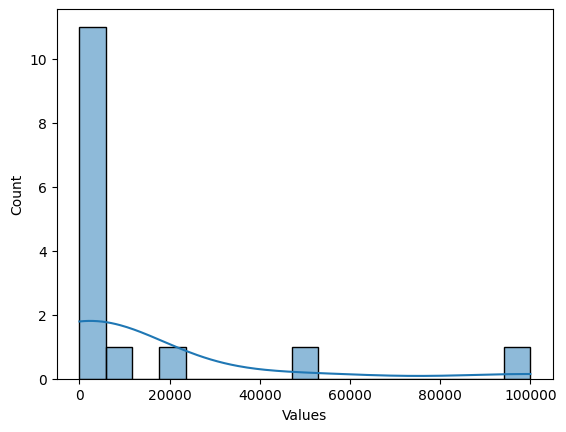

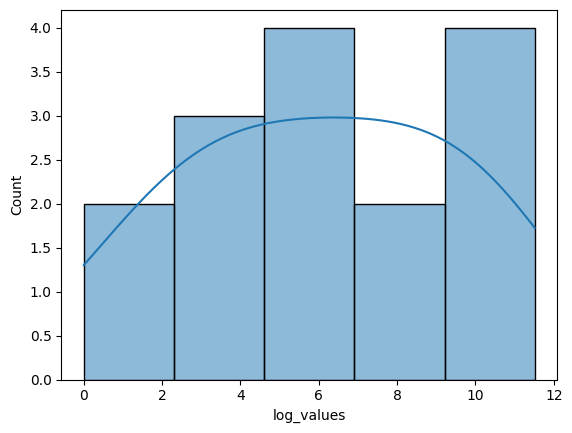

In [51]:
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.show()